# LOGISTIC REGRESSION

In [1289]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns

np.random.seed(42)

%matplotlib inline

In [1290]:
df=pd.read_csv("titanic.csv")

In [1291]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

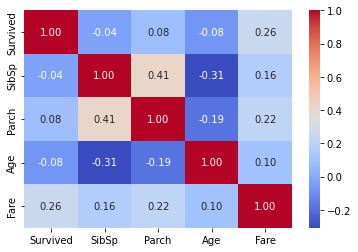

In [1292]:
sns.heatmap(df[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')


<AxesSubplot:xlabel='Embarked'>

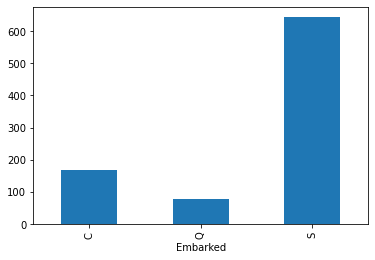

In [1293]:
df.groupby('Embarked').size().plot(kind='bar')


In [1294]:
df['Embarked'].fillna('S', inplace=True)
df['Embarked'].isna().sum()

0

In [1295]:
age_mean=df["Age"].mean()
df["Age"].fillna(age_mean,inplace=True)
df["Age"].isna().sum()

0

In [1296]:
dummies=pd.get_dummies(df.loc[:,["Sex","Embarked"]])

df[dummies.columns] = dummies
#df["Sex"] = df["Sex"].astype("category")
#df["Sex"] = df["Sex"].cat.codes
#df["Embarked"] = df["Embarked"].astype("category")
#df["Embarked"] = df["Embarked"].cat.codes
df.drop(["Cabin","PassengerId","Name","Ticket","Fare","Sex","Embarked"],axis=1,inplace=True)
dummies

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [1297]:
train=df.sample(frac=0.8)
test=df.drop(train.index)

train_y=train["Survived"].to_numpy()
train_x=train.drop(["Survived"],axis=1).to_numpy()
test_y=test["Survived"].to_numpy()
test_x=test.drop(["Survived"],axis=1).to_numpy()


In [1298]:
train_y=np.reshape(train_y,(train_y.size,1))
test_y=np.reshape(test_y,(test_y.size,1))
train_y.shape

(713, 1)

In [1299]:
#bias_col = np.ones(shape=(1,train_x.shape[1]))
bias_col = np.ones(shape=(train_x.shape[0],1))
train_x = np.hstack((bias_col, train_x))

#train_x = np.vstack((bias_col, train_x))
#b=np.ones((1,train_y.shape[1]))
#train_y=np.vstack((b,train_y))


#bias_col = np.ones(shape=(1,test_x.shape[1]))
bias_col = np.ones(shape=(test_x.shape[0],1))

#test_x=np.vstack((bias_col, test_x))
test_x=np.hstack((bias_col, test_x))
#b=np.ones((1,test_y.shape[1]))
#test_y=np.vstack((b,test_y))

#train_y.shape

In [1300]:
class LogisticRegression:
    def __init__(self,features,samples : int):
        self.features=features
        self.theta=np.ones((self.features,1))
        self.learning_rate=0.01
        self.samples=samples
        
    def sigmoid(self,z:np.ndarray):
        sig=(np.exp(-z))
        sig=1/(1+sig)
        return sig
    
    def predict(self,x : np.ndarray):
        #print(self.bias,self.theta.shape,x.shape)
        z=np.dot(x,self.theta)
        return self.sigmoid(z)   
    
    
    
    def cross_entropy(self,w,y):
        epsilon=1e-10
        y_0=(1-y)*(np.log(1-w+epsilon))
        y_1=(y)*(np.log(w+epsilon))
        
        cost=np.sum(y_0+y_1)
        cost=-cost/self.samples
        return cost
    
    def grad_descent(self,x:np.ndarray,y:np.ndarray,predicted:np.ndarray):
        z=y-predicted
        z1=(-1)*(1/self.samples)*np.dot(x.T,z)
        self.theta-=self.learning_rate*z1

        
        
    def train(self,x,y,n=1000):
        losses=[]
        for i in range(n):
            z=np.dot(x,self.theta)
            predicted=self.sigmoid(z)
            losses.append(self.cross_entropy(predicted,y))
            self.grad_descent(x,y,predicted)
        return losses
    
    def evaluate(self,x):
        z=self.predict(x)
        return np.where(z>0.5,1,0)

In [1301]:
model=LogisticRegression(train_x.shape[1],train_x.shape[0])

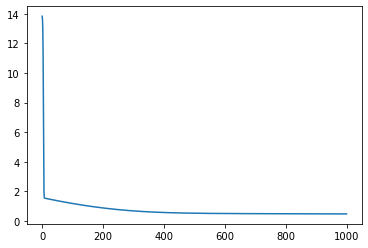

In [1302]:
losses=model.train(train_x,train_y)
plt.plot(losses)

In [1303]:
ypred=model.evaluate(test_x)
ypred

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [1304]:
f1_score(test_y,ypred)

0.6055045871559633

In [1305]:
(sum(ypred == test_y) / len(ypred)) * 100

array([75.84269663])